# Project 1: SAT & ACT Analysis


## Problem Statement

Millions of students prepare for college across the country each year. Given the choice students have between which college admissions test to take, how might we increase statewide participation in the SATs?

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [22]:
#Imports:
import pandas as pd
import numpy as np

## Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [23]:
# reading in provided data 
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [24]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [19]:
act_2017.head(10)

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,national,60%,20.3,20.7,21.4,21.0,21.0
1,alabama,100%,18.9,18.4,19.7,19.4,19.2
2,alaska,65%,18.7,19.8,20.4,19.9,19.8
3,arizona,62%,18.6,19.8,20.1,19.8,19.7
4,arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,california,31%,22.5,22.7,23.1,22.2,22.8
6,colorado,100%,20.1,20.3,21.2,20.9,20.8
7,connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,delaware,18%,24.1,23.4,24.8,23.6,24.1
9,district of columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Each of these data tables includes the average participation rate, total/composite scores, and individual subject scores for each state. Washington DC is also included.

#### 4a. Does the data look complete? 

Data looks complete, no missing values

In [25]:
# look through the shape and data types
act_2017.info(); 
sat_2017.info();

# look for summary stats. Are there any outliers?
act_2017.describe();
sat_2017.describe();

# is there missing data?
act_2018.isnull().sum(); 
act_2017.isnull().sum();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [26]:
sat_min_2017 = sat_2017[["Evidence-Based Reading and Writing", "Math"]].min()
sat_min_2017

Evidence-Based Reading and Writing    482
Math                                   52
dtype: int64

In [27]:
sat_min_2018 = sat_2018[["Evidence-Based Reading and Writing", "Math"]].min()
sat_min_2018

Evidence-Based Reading and Writing    480
Math                                  480
dtype: int64

In [28]:
act_min_2017 = act_2017[["English", "Math", "Reading", "Science", "Composite"]].min()
act_min_2017

English      16.3
Math         18.0
Reading      18.1
Science       2.3
Composite    17.8
dtype: float64

In [29]:
act_min_2018 = act_2018["Composite"].min()
act_min_2018

17.7

Answer:

In the SAT 2017 dataset, the lowest scores for Math is 52 while the lowest score for Evidence-Based Reading and Writing is 482. [According to the College Board](https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting), the lowest possible score for math is 200 so there's something off about our dataset. In SAT 2018, the lowest scores for Math and English were both 480.

In the ACT 2017 dataset, the lowest scores in the data set are:

English:      16.3

Math:         18.0

Reading:      18.1

Science:       2.3

Composite:    17.8

The lowest composite score in the ACT 2017 dataset was 17.7

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [30]:
# code
# looking for the state with the math score that is out of range. 
sat_2017[sat_2017["Math"]== 52]


# According to the Maryland gov site, the national average for Math in 2017 was 528
sat_2017["Math"].replace(52, 528, inplace = True)

In [31]:
# When looking at the tail of the dataset, act_2017,
#looks like there's an x at the Composite score for Wyoming
act_2017["Composite"].replace("20.2x", 20.2, inplace = True) # remove the x at the end of string

In [32]:
# Later when I was merging the datasets, I noticed that 
# Maine is listed twice in ACT 2018 data set
act_2018.drop(19, inplace = True) # removes the extra row

#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [18]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [19]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

What did you learn?
- ACT stores its scores as floats, while SAT stores its scores as integers.
- Do any of them seem odd?  
    - Participation is stored as a string in all the data sets, which will not be useful for us when doing analysis.
- Which ones are not as they should be?  
    - Participation should be changed to a float.
    - In ACT 2017, the composite score is stored as a string, and should be changed into a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [33]:
# converting the participation values from strings into floats

def string_to_float_percent(df, column_to_convert):
    df[column_to_convert] = df[column_to_convert].str.replace("%", "") # removes the % sign
    df[column_to_convert] = df[column_to_convert].astype("float64") # converts to float
    df[column_to_convert]= df[column_to_convert].map(lambda x: x/100)


In [34]:
# run my function on the participation columns

string_to_float_percent(sat_2017, "Participation")
string_to_float_percent(sat_2018, "Participation")
string_to_float_percent(act_2017, "Participation")
string_to_float_percent(act_2018, "Participation")

- Fix any individual values preventing other columns from being the appropriate type.

In [35]:
# The composite scores in ACT are stored as strings
# Here's a function to convert strings into floats
def string_to_float(df, column_to_convert):
    df[column_to_convert] = df[column_to_convert].astype("float64")

In [36]:
# run my function on the composite columns
string_to_float(act_2017, "Composite")
string_to_float(act_2018, "Composite")

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [27]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [28]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [29]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [30]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [37]:
# renaming columns for SAT 2017
sat_2017.columns = sat_2017.columns.str.lower()

sat_2017.rename(columns = {"participation": "sat_participation_2017",
                     "evidence-based reading and writing": "sat_verbal_2017",
                          "math": "sat_math_2017",
                          "total": "sat_total_2017"},
          inplace = True)

In [38]:
# renaming columns for SAT 2018
sat_2018.columns = sat_2018.columns.str.lower()

sat_2018.rename(columns = {"participation": "sat_participation_2018",
                     "evidence-based reading and writing": "sat_verbal_2018",
                          "math": "sat_math_2018",
                          "total": "sat_total_2018"},
          inplace = True)

In [39]:
# renaming columns for ACT 2017

act_2017.columns = act_2017.columns.str.lower()

act_2017.rename(columns = {"participation": "act_participation_2017",
                             "english": "act_english_2017",
                              "math": "act_math_2017",
                              "reading": "act_reading_2017",
                             "science" : "act_science_2017",
                               "composite" : "act_composite_2017"},
          inplace = True)

In [40]:
# renaming columns for ACT 2018

act_2018.columns = act_2018.columns.str.lower()

act_2018.rename(columns = {"participation": "act_participation_2018",
                           "composite" : "act_composite_2018"},
          inplace = True)

Before I merge my data sets, I will lowercase all state names so the merge is clean.

In [41]:
# lowercasing all the state names

act_2017["state"] = act_2017["state"].str.lower()
act_2018["state"] = act_2018["state"].str.lower()
sat_2017["state"] = sat_2017["state"].str.lower()
sat_2018["state"] = sat_2018["state"].str.lower()

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state                     | object|ACT|
|act_participation_2017    |float64|ACT|Percent of students in the the class of 2017 who took the ACT|
|act_english_2017          |float64|ACT|State average in English|
|act_math_2017             |float64|ACT|State average in Math|
|act_reading_2017          |float64|ACT|State average in Reading|
|act_science_2017          |float64|ACT|State average in Science|
|act_composite_2017        |float64|ACT|State average Composite score| 
|act_participation_2018    |float64|ACT|Percent of students in the the class of 2018 who took the ACT|
|act_composite_2018        |float64|ACT|State average Composite score| 
|sat_participation_2017    |float64|SAT|Percent of students in the the class of 2017 who took the SAT|
|sat_verbal_2017                 |int64|SAT|State average in Reading and Writing|
|sat_math_2017               |int64|SAT|State average in Math|
|sat_total_2017              |int64|SAT|State average Total score|
|sat_participation_2018    |float64|SAT|Percent of students in the the class of 2018 who took the SAT|
|sat_verbal_2018                 |int64|SAT|State average in Reading and Writing|
|sat_math_2018               |int64|SAT|State average in Math|
|sat_total_2018              |int64|SAT|State average Total score|
|act_participation_change|float64|ACT|Change in participation rates from 2017 to 2018|
|sat_participation_change|float64|SAT|Change in participation rates from 2017 to 2018|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [42]:
# ACT 2017 had a national row
act_2017.drop(0, axis=0, inplace= True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [43]:
# merging the ACT and SAT 2017 data sets
act_sat_2017 = pd.merge(act_2017, sat_2017, how = "left")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [44]:
# write out the dataset into a csv
act_sat_2017.to_csv("../data/act_sat_2017.csv", index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [45]:
#read in data from 2018 ACT PDF
act_2018_pdf = pd.read_csv('../data/act_2018_pdf.csv')

In [46]:
act_2018_pdf.drop(33, axis=0, inplace= True) #remove washington DC

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [47]:
act = pd.merge(act_2017, act_2018, how = "left")# i used the given 2018 csv , not the csv from PDF 

In [48]:
sat = pd.merge(sat_2017, sat_2018, how = "left")

In [49]:
final = pd.merge(act, sat, how = "left")

In [45]:
# write file to csv
final.to_csv("../data/final.csv", index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [46]:
#Code:
final.describe()

,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,act_participation_2018,act_composite_2018,sat_participation_2017,sat_verbal_2017,sat_math_2017,sat_total_2017,sat_participation_2018,sat_verbal_2018,sat_math_2018,sat_total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,0.617255,21.496078,0.398039,569.117647,556.960784,1126.098039,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,0.340371,2.111583,0.352766,45.666901,47.068869,92.494812,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.070000,17.700000,0.020000,482.000000,468.000000,950.000000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,0.285000,19.950000,0.040000,533.500000,523.500000,1055.500000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.660000,21.300000,0.380000,559.000000,548.000000,1107.000000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,1.000000,23.650000,0.660000,613.000000,599.000000,1212.000000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,25.600000,1.000000,644.000000,651.000000,1295.000000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [50]:
def calculate_std(column):
    mean = np.mean(column)
    sum=0
    for i in column:
        sum+= ((i - mean)**2)
    sd = np.sqrt(sum/51)
    return sd

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [51]:
# custom dictionary for std for each column
{key: calculate_std(value) for key, value in final.iloc[:, 1:].items()}

{'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_composite_2017': 2.000786081581989,
 'act_participation_2018': 0.33701735820410317,
 'act_composite_2018': 2.090779082141178,
 'sat_participation_2017': 0.3492907076664507,
 'sat_verbal_2017': 45.21697020437866,
 'sat_math_2017': 46.605125016635505,
 'sat_total_2017': 91.58351056778743,
 'sat_participation_2018': 0.3694661922353942,
 'sat_verbal_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433}

In [52]:
# comparing my values to the numpy std values
{key: np.std(value) for key, value in final.iloc[:, 1:].items()}

{'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_composite_2017': 2.000786081581989,
 'act_participation_2018': 0.33701735820410317,
 'act_composite_2018': 2.090779082141178,
 'sat_participation_2017': 0.3492907076664507,
 'sat_verbal_2017': 45.21697020437866,
 'sat_math_2017': 46.605125016635505,
 'sat_total_2017': 91.58351056778743,
 'sat_participation_2018': 0.3694661922353942,
 'sat_verbal_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

My manual calculations are closer to the output from pandas describe. Both my manual calculations and pandas describe are slightly off from numpy's std method. I assume this is because I used an integer value, 51, to calculate my mean as opposed to a float.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

A quick look into the participation column shows that many states of 100% participation, so I will create a filter for states that have 100% to get the highest participation rates.

In [53]:
# made a function to create a dataframe of states with the highest participation rates
def get_states_high_participation(df, columns_interested):
    for column in columns_interested:
        states_high_participation_dict.update({column: list(df[df[column] ==1]["state"])})

In [54]:
# create a dictionary of states with the highest participation

columns_interested = ["act_participation_2017", "act_participation_2018", "sat_participation_2017", "sat_participation_2018"]
states_high_participation_dict= {}

get_states_high_participation(final, columns_interested)

In [55]:
# convert dictionary to data frame

states_high_participation_df = pd.DataFrame.from_dict(states_high_participation_dict, orient="index").T

## Here are the states with 100% participation for each of the test/years:

I wanted to create a data frame to be able to compare the states between each year.

Interesting to note that Colorado and Minnesota had 100% participation in ACT 2017, but not in 2018. Washington DC had 100% participation in SAT 2017, but not in 2018. We can look to see if these states are switching between tests, maybe.

In [57]:
print("States that had a 100% participation on either tests")
states_high_participation_df 
# I could have done this without creating a dictionary and then converting back into a pandas dataframe,
# but I thought it would be easier to read a list of state names in columns

States that had a 100% participation on either tests


,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
0,alabama,alabama,connecticut,colorado
1,arkansas,arkansas,delaware,connecticut
2,colorado,kentucky,district of columbia,delaware
3,kentucky,louisiana,michigan,idaho
4,louisiana,mississippi,None,michigan
5,minnesota,missouri,None,None
6,mississippi,montana,None,None
7,missouri,nebraska,None,None
8,montana,nevada,None,None
9,nevada,north carolina,None,None


## Which states have the lowest participation?

In [62]:
# select for 5 states that had the lowest participation rates
states_low_participation_dict= {}
def get_states_low_participation(df, columns_interested):
    for column in columns_interested:
        states_low_participation_dict.update({column: 
                                             list(df.sort_values(column, ascending = False)["state"].tail(5))})

In [63]:
get_states_low_participation(final, columns_interested) # create the dictionary

In [65]:
states_low_participation_df = pd.DataFrame.from_dict(states_low_participation_dict)

## 5 states with the lowest participation each year

In [66]:
states_low_participation_df

,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
0,pennsylvania,pennsylvania,arkansas,mississippi
1,rhode island,delaware,wyoming,iowa
2,delaware,new hampshire,north dakota,wisconsin
3,new hampshire,rhode island,mississippi,wyoming
4,maine,maine,iowa,north dakota


## Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [67]:
columns_totals = ["act_composite_2017", "act_composite_2018", "sat_total_2017", "sat_total_2018" ]
states_high_scores_dict= {}
def get_states_highest_scores(df, columns_totals):
    for column in columns_totals:
        states_high_scores_dict.update({column: 
                                             list(df.sort_values(column, ascending = False)["state"].head(5))})
        
get_states_highest_scores(final, columns_totals)

states_highest_scores_df = pd.DataFrame.from_dict(states_high_scores_dict)

## Top 5 States with the highest total/composite scores

In [68]:
states_highest_scores_df

,act_composite_2017,act_composite_2018,sat_total_2017,sat_total_2018
0,new hampshire,connecticut,minnesota,minnesota
1,massachusetts,massachusetts,wisconsin,wisconsin
2,connecticut,new hampshire,iowa,north dakota
3,maine,new york,missouri,iowa
4,district of columbia,michigan,kansas,kansas


In [69]:
states_low_scores_dict= {}
def get_states_lowest_scores(df, columns_totals):
    for column in columns_totals:
        states_low_scores_dict.update({column: 
                                             list(df.sort_values(column, ascending = False)["state"].tail(5))})
        
get_states_lowest_scores(final, columns_totals)

states_low_scores_df = pd.DataFrame.from_dict(states_low_scores_dict)

## 5 states with the lowest in total/composite scores

In [61]:
states_low_scores_df

,act_composite_2017,act_composite_2018,sat_total_2017,sat_total_2018
0,north carolina,alabama,maine,hawaii
1,hawaii,hawaii,idaho,idaho
2,south carolina,mississippi,michigan,west virginia
3,mississippi,south carolina,delaware,delaware
4,nevada,nevada,district of columbia,district of columbia


## Do any states with 100% participation on a given test have a rate change year-to-year?

- Colorado had a 100% participation in ACT 2017, but it dropped down to 30% in 2018. They had a 100% participation in SAT 2018, which looks like they made a decision to switch over to the SAT's after 2017.
- DC dropped a little bit in their SAT participation, from 100% in 2017 to 92% in 2018.

In [62]:
# selecting for participation columns
participation = final[["state", "act_participation_2017",'act_participation_2018','sat_participation_2017',"sat_participation_2018"]]

In [63]:
# let's look at the states with the highest participation rates
participation.sort_values("act_participation_2017", ascending = False).head()
participation.sort_values("sat_participation_2017", ascending = False).head()

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
8,district of columbia,0.32,0.32,1.00,0.92
22,michigan,0.29,0.22,1.00,1.00
6,connecticut,0.31,0.26,1.00,1.00
7,delaware,0.18,0.17,1.00,1.00
29,new hampshire,0.18,0.16,0.96,0.96



Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Do any states have >50% participation on *both* tests either year?
- Florida, Georgia, and Hawaii have over 50% participation on both tests in 2017 and 2018.


In [64]:
# filter for states with over 50% participation in both years
participation[(participation.iloc[:, 1:] > .5).all(axis=1)]

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
9,florida,0.73,0.66,0.83,0.56
10,georgia,0.55,0.53,0.61,0.70
11,hawaii,0.90,0.89,0.55,0.56


In [70]:
# create a column for the change in participation rates for ACT and SAT
final["act_participation_change"]= (final["act_participation_2018"] - final["act_participation_2017"]) /final["act_participation_2017"]
final["sat_participation_change"]= (final["sat_participation_2018"] - final["sat_participation_2017"]) /final["sat_participation_2017"]

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

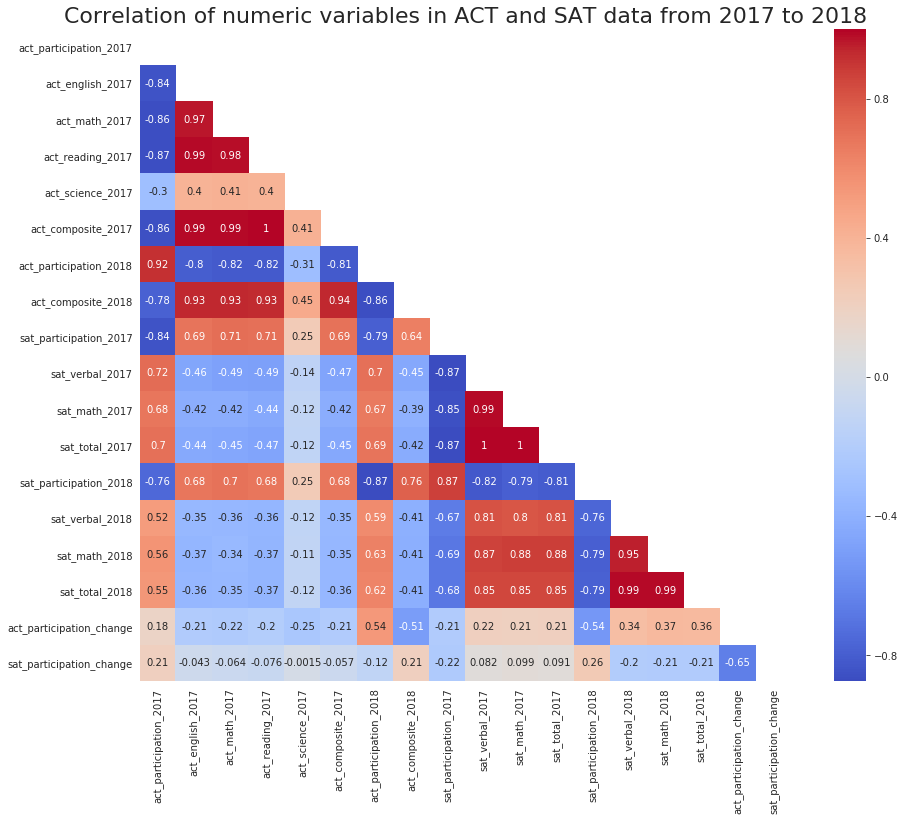

In [74]:
# A:
plt.figure(figsize=(15,12))
#sns.heatmap(final.corr(), annot=True, cmap="coolwarm")

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(final.corr(), mask=mask,  square=True, annot=True, cmap="coolwarm") #change heatmap gradient here

plt.title("Correlation of numeric variables in ACT and SAT data from 2017 to 2018", fontsize=22);

## Some obvious takeaways from the heatmap show:
- Participation in ACT is negatively correlated with participation in SAT
- The individual subject scores are strongly (and positively) correlated to the total/composite scores

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [75]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10),dpi = 90) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = ["#5caccf", "#5caccf", "#76A08A", "#76A08A"]
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = colors[i]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set(title=title)
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set(xlabel=xlabel)
    plt.subplots_adjust(hspace=0.3)


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

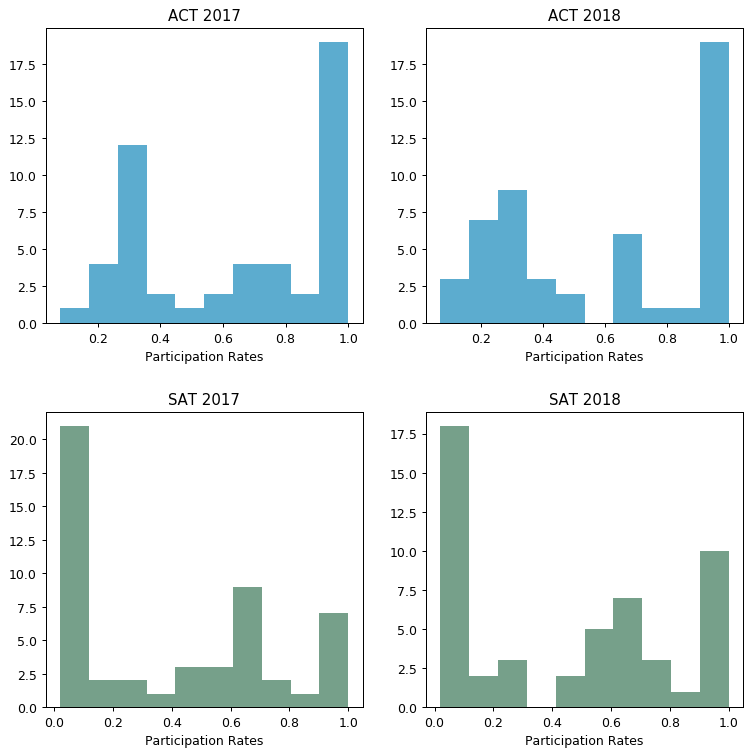

In [76]:
# Plotting participation rates
participation_rates = ["act_participation_2017", "act_participation_2018", "sat_participation_2017", "sat_participation_2018"] 
participation_titles = ["ACT 2017", "ACT 2018", "SAT 2017", "SAT 2018"]
participation_labels = ["Participation Rates"]*4
subplot_histograms(final, participation_rates, participation_titles, participation_labels)

Missing Math score data for ACT 2018


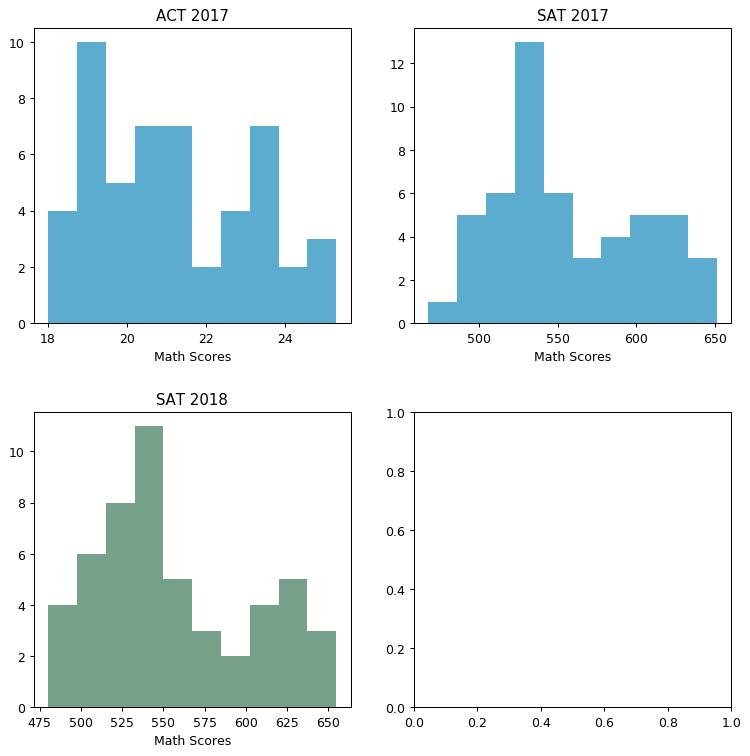

In [77]:
# Let's look at Math scores
print("Missing Math score data for ACT 2018")
math_columns = ["act_math_2017", "sat_math_2017", "sat_math_2018"] 
math_titles = ["ACT 2017",  "SAT 2017", "SAT 2018"]
math_labels= ["Math Scores"]*3
subplot_histograms(final, math_columns, math_titles, math_labels)


Missing reading score data for ACT 2018


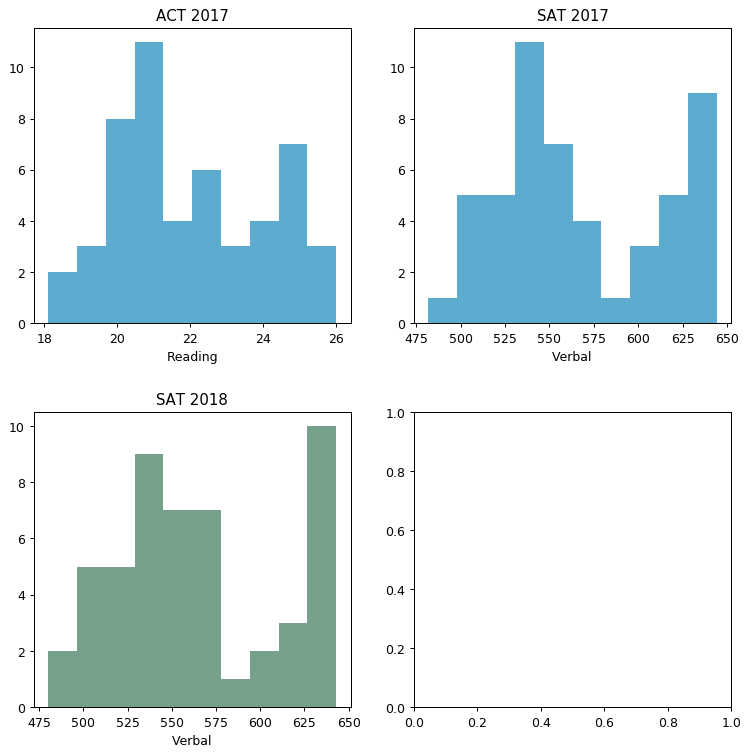

In [78]:
# Compare reading/verbal scores
print("Missing reading score data for ACT 2018")
list_of_columns_verbal=["act_reading_2017", "sat_verbal_2017","sat_verbal_2018"]
list_of_titles_verbal = ["ACT 2017",  "SAT 2017", "SAT 2018"]
list_of_labels_verbal = ["Reading", "Verbal", "Verbal"]
subplot_histograms(final, list_of_columns_verbal, list_of_titles_verbal, list_of_labels_verbal)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [79]:
# custom funnction to plot scatterplots
def plot_scatterplot(dataframe, list_of_columns, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5), dpi=80)
    plt.scatter(dataframe[list_of_columns[0]],
            dataframe[list_of_columns[1]]) #c is color
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize=12);

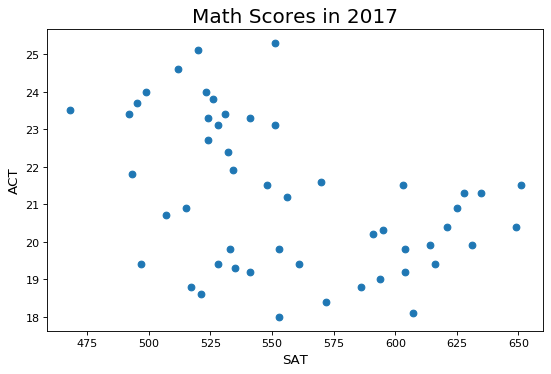

In [80]:
# see correlation between SAT and ACT math scores in 2017
plot_scatterplot(final, ["sat_math_2017", "act_math_2017"], "Math Scores in 2017", "SAT", "ACT")

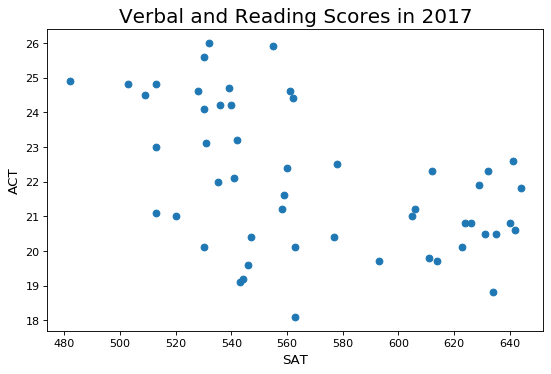

In [75]:
# see correlation between SAT and ACT verbal scores in 2017
plot_scatterplot(final, ["sat_verbal_2017", "act_reading_2017"], "Verbal and Reading Scores in 2017", "SAT", "ACT")

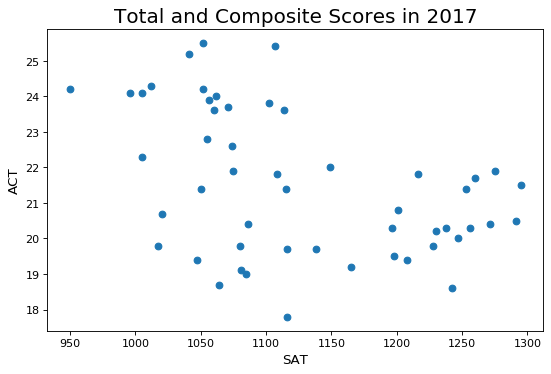

In [76]:
# see correlation between  ACT composite scores in 2017 and 2018
plot_scatterplot(final, ["sat_total_2017", "act_composite_2017"], "Total and Composite Scores in 2017", "SAT", "ACT")

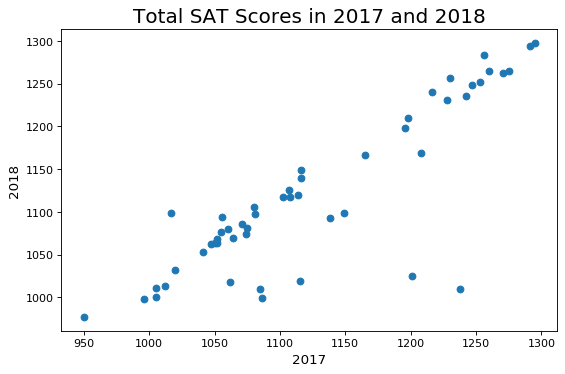

In [81]:
# see correlation between SAT total scores in 2017 and 2018
plot_scatterplot(final, ["sat_total_2017", "sat_total_2018"], "Total SAT Scores in 2017 and 2018", "2017", "2018")

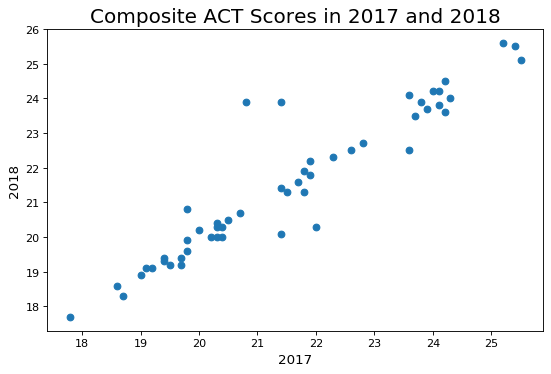

In [78]:
# compare ACT composite scores in 2017 and 2018
plot_scatterplot(final, ["act_composite_2017", "act_composite_2018"], "Composite ACT Scores in 2017 and 2018", "2017", "2018")

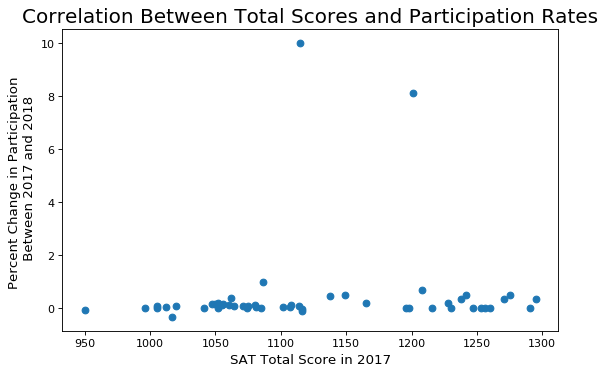

In [83]:
# I was curious to see if there was any correlation between total SAT scores in 2017 and change in participation rates
plot_scatterplot(final, ["sat_total_2017", "sat_participation_change"], "Correlation Between Total Scores and Participation Rates", "SAT Total Score in 2017", "Percent Change in Participation \n Between 2017 and 2018")

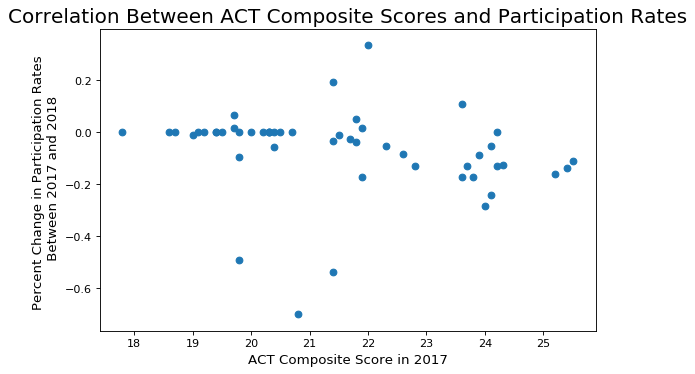

In [84]:
# I was curious to see if there was any correlation between total ACT scores in 2017 and change in participation rates
plot_scatterplot(final, ["act_composite_2017", "act_participation_change"], "Correlation Between ACT Composite Scores and Participation Rates", "ACT Composite Score in 2017", "Percent Change in Participation Rates \n Between 2017 and 2018")

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [85]:
# custom function for boxplots
def plot_boxplot(dataframe, list_of_columns, title):
    plt.figure(figsize=(6, 4), dpi=80)
    sns.boxplot(data = dataframe[list_of_columns], orient="h", palette = "Set2")
    plt.title(title, fontsize=18);

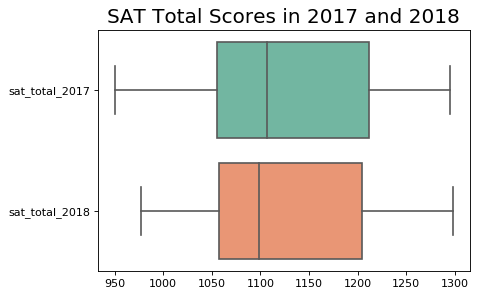

In [86]:
# compare SAT total scores in 2017 and 2018
plot_boxplot(final, ["sat_total_2017", "sat_total_2018"], "SAT Total Scores in 2017 and 2018")

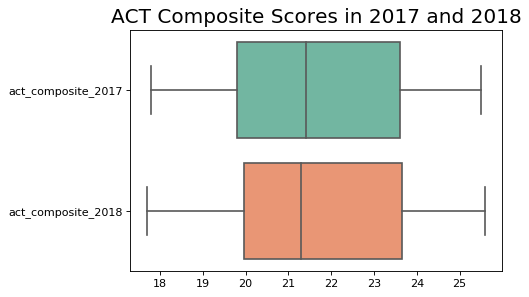

In [87]:
# compare ACT total scores in 2017 and 2018
plot_boxplot(final, ["act_composite_2017", "act_composite_2018"], "ACT Composite Scores in 2017 and 2018")

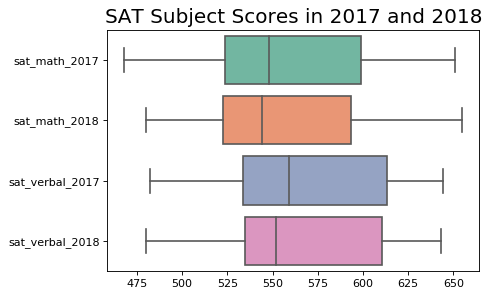

In [88]:
# compare SAT subject scores
plot_boxplot(final, ["sat_math_2017", 
                     "sat_math_2018", "sat_verbal_2017", "sat_verbal_2018"], "SAT Subject Scores in 2017 and 2018")


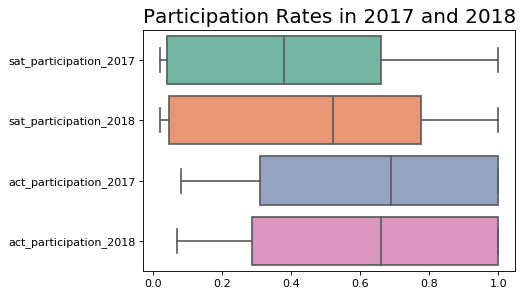

In [89]:
# compare SAT participation rates
plot_boxplot(final, ["sat_participation_2017", 
                     "sat_participation_2018", 
                     "act_participation_2017", 
                     "act_participation_2018",], "Participation Rates in 2017 and 2018")


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

# Curious to look at the percent change in participation rates in both tests between 2017 and 2018

In [90]:
# plt.figure(figsize=(10, 4), dpi=80)
# sns.boxplot(data = final[["sat_participation_change", "act_participation_change"]], orient="h", palette = "Set2")
# plt.title("Participation Rate Changes in 2017 and 2018", fontsize=18);

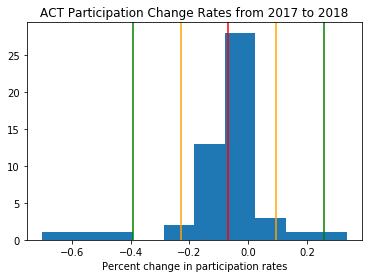

In [82]:
# plot the distribution of change for ACT
# final["act_participation_change"].describe()

act_mean = np.mean(final["act_participation_change"])
act_std = np.std(final["act_participation_change"])
plt.hist(final["act_participation_change"])
plt.axvline(act_mean, color = '#ff0000')

# Z-score of 1
plt.axvline(act_mean+ 1* act_std, color = "orange")
# Z- score of -1
plt.axvline(act_mean- 1* act_std, color = "orange")
# Z-score of 2
plt.axvline(act_mean+ 2* act_std, color = "green")

# Z- score of -2
plt.axvline(act_mean- 2*act_std, color = "green")
plt.xlabel("Percent change in participation rates")
plt.title("ACT Participation Change Rates from 2017 to 2018");

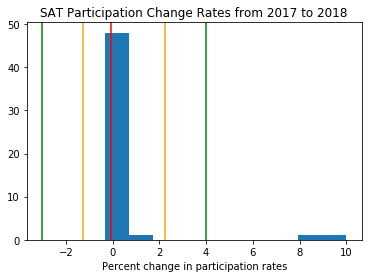

In [83]:
# Let's look at the distribution for SAT
# final["sat_participation_change"].describe()

sat_mean = np.mean(final["sat_participation_change"])
sat_std = np.std(final["sat_participation_change"])
plt.hist(final["sat_participation_change"])
plt.axvline(act_mean, color = '#ff0000')

# Z-score of 1
plt.axvline(sat_mean+ 1* sat_std, color = "orange")
# Z- score of -1
plt.axvline(sat_mean- 1* sat_std, color = "orange")
# Z-score of 2
plt.axvline(sat_mean+ 2* sat_std, color = "green")

# Z- score of -2
plt.axvline(sat_mean- 2*sat_std, color = "green")
plt.xlabel("Percent change in participation rates")
plt.title("SAT Participation Change Rates from 2017 to 2018");

# Visualize the change in participation rates for ACT

First I had to change the data format so I can plot a line graph

In [94]:
# let's select for the states that had a negative participation change 
# for ACT, I set my filter at 0.22 as one std away from the mean
# for SAT, since the data had a couple outliers, I looked for states that had a negative participation change

# look at ACT changes that are increasing
drop_act = final[(final["act_participation_change"] > 0)]

In [95]:
# creating a new df for the participation rates for ACT 2017
act_2017_participation =drop_act.loc[:, ["state", "act_participation_2017", "act_participation_change"]]

# adding a year variable so I can plot this on X axis
act_2017_participation["year"] = 2017

# renaming the act_participation_2017 column so I can add this df back to the 2017 df
act_2017_participation.rename(columns = {"state": "state",
                     "act_participation_2017": "participation",
                          "year": "year"},
          inplace = True)

In [96]:
# creating a new df for the participation rates for ACT 2018
act_2018_participation = drop_act.loc[:, ["state", "act_participation_2018", "act_participation_change"]]

# adding a year variable so I can plot this on X axis
act_2018_participation["year"] = 2018

# renaming the act_participation_2018 column so I can add this df back to the 2017 df
act_2018_participation.rename(columns = {"state": "state",
                     "act_participation_2018": "participation",
                          "year": "year"},
          inplace = True)

In [97]:
# rbind act_2017_participation and act_2018_participation
act_participation = pd.concat([act_2017_participation, act_2018_participation])

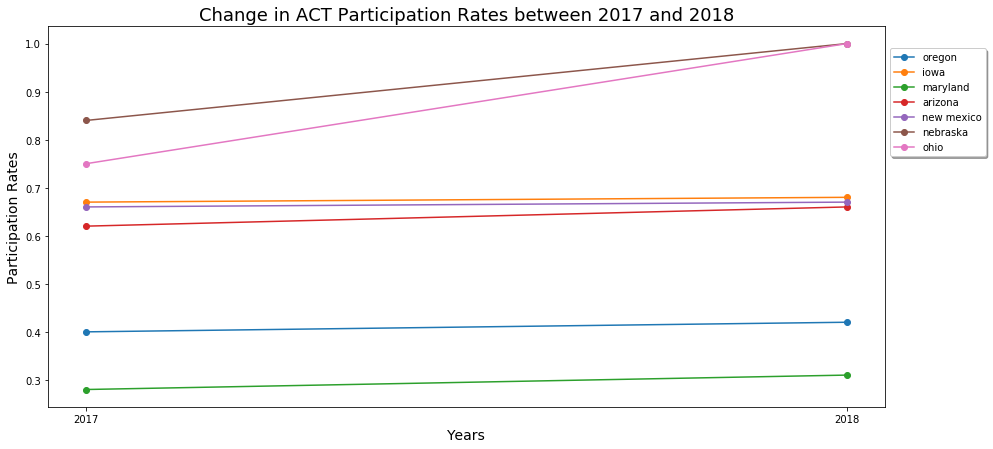

In [98]:
# Got this plot code from lecture 2.02-lesson-principles_of_data_visualization 

#Establish the size of the figure.
plt.figure(figsize=(15, 7))
# Create line plot of all stock volumes over 2012.
for i in set(act_participation["state"]):
    plt.plot(act_participation[(act_participation['state'] == i) & ((act_participation['year'] == 2017) | (act_participation['year'] == 2018))]['year'],
             #grabbing 2 dates
         act_participation[(act_participation['state'] == i) & ((act_participation['year'] == 2017) | (act_participation['year'] == 2018))]['participation'],
         label = i,
         marker = 'o')
plt.legend(loc='center left', bbox_to_anchor=(1, .8),
          fancybox=True, shadow=True)
plt.xticks((2017, 2018))
plt.title("Change in ACT Participation Rates between 2017 and 2018", fontsize=18)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Participation Rates", fontsize = 14);

#plt.savefig(fname='../images/ACT_participation_rates.png', dpi=300)

# Repeat this visualization for change in participation for SAT

In [99]:
# let's select for the states that had a negative participation change 
# for ACT, I set my filter at 0.22 as one std away from the mean
# for SAT, since the data had a couple outliers, I looked for states that had a negative participation change
drop_act = final[(final["sat_participation_change"] < 0)]


# creating a new df for the participation rates for SAT 2017
sat_2017_participation =drop_act.loc[:, ["state", "sat_participation_2017", "sat_participation_change"]]

# adding a year variable so I can plot this on X axis
sat_2017_participation["year"] = 2017

# renaming the act_participation_2017 column so I can add this df back to the 2017 df
sat_2017_participation.rename(columns = {"state": "state",
                     "sat_participation_2017": "participation",
                          "year": "year"},
          inplace = True)



# creating a new df for the participation rates for SAT 2018
sat_2018_participation = drop_act.loc[:, ["state", "sat_participation_2018", "sat_participation_change"]]

# adding a year variable so I can plot this on X axis
sat_2018_participation["year"] = 2018

# renaming the act_participation_2018 column so I can add this df back to the 2017 df
sat_2018_participation.rename(columns = {"state": "state",
                     "sat_participation_2018": "participation",
                          "year": "year"},
          inplace = True)


# rbind act_2017_participation and act_2018_participation
sat_participation = pd.concat([sat_2017_participation, sat_2018_participation])

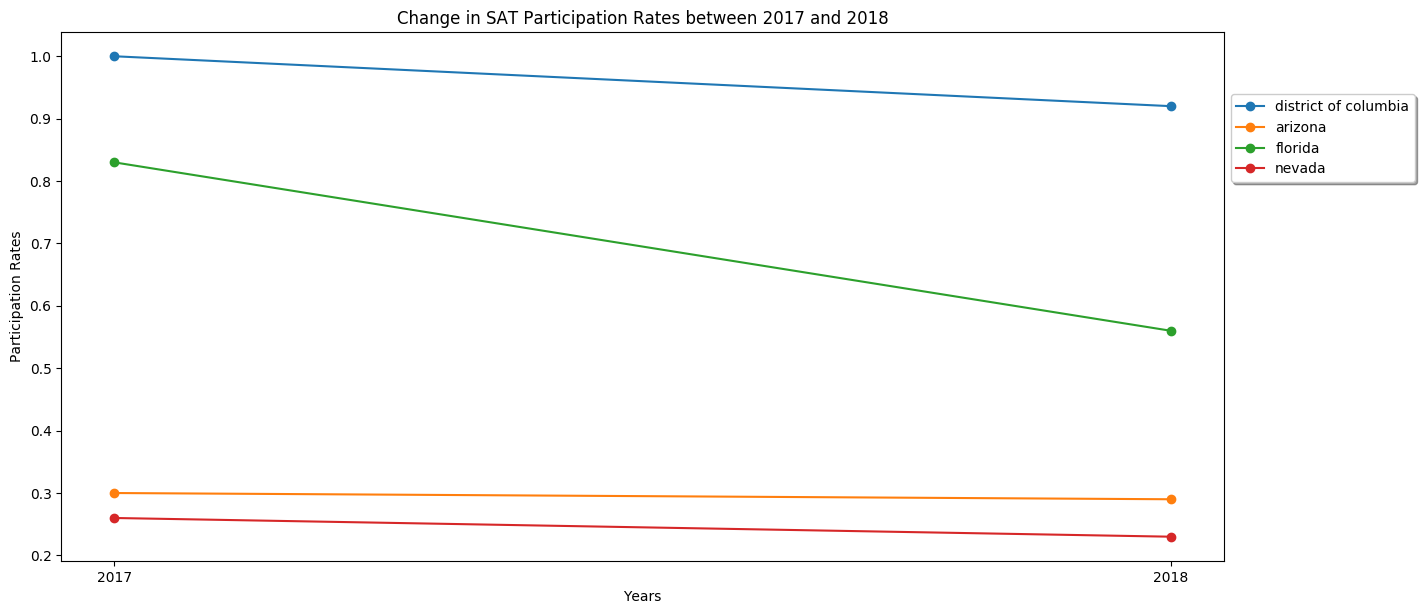

In [101]:
# Got this plot code from lecture 2.02-lesson-principles_of_data_visualization 

#Establish the size of the figure.
plt.figure(figsize=(15, 7), dpi=100)
# Create line plot of all stock volumes over 2012.
for i in set(sat_participation["state"]):
    plt.plot(sat_participation[(sat_participation['state'] == i) & ((sat_participation['year'] == 2017) | (sat_participation['year'] == 2018))]['year'],
             #grabbing 2 dates
         sat_participation[(sat_participation['state'] == i) & ((sat_participation['year'] == 2017) | (sat_participation['year'] == 2018))]['participation'],
         label = i,
         marker = 'o')
plt.legend(loc='center left', bbox_to_anchor=(1, .8),
          fancybox=True, shadow=True)
plt.xticks((2017, 2018))
plt.title("Change in SAT Participation Rates between 2017 and 2018", fontsize=12)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Participation Rates", fontsize = 10);
#plt.savefig(fname='../images/SAT_participation_rates.png', dpi=300)

# What states mandated each test in 2018?

In [84]:
act_mandated = final[final["act_participation_2018"] == 1]

In [85]:
sat_mandated = final[final["sat_participation_2018"] == 1]["state"]

In [86]:
mandated = pd.DataFrame(data = [["ACT", len(act_mandated)], ["SAT", len(sat_mandated)]], columns = ["test", "total_states"])

In [87]:
mandated

,test,total_states
0,ACT,17
1,SAT,5


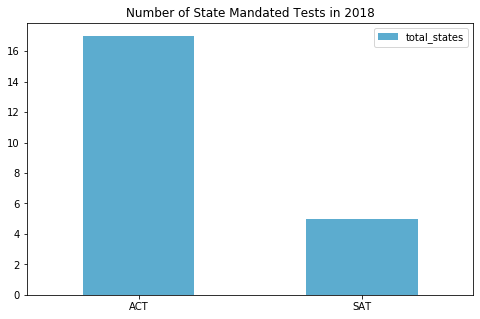

In [88]:
# plot the total number of states sponsoring each test in 2018. 
# this code was written in collaboration with Maria Flores

pd.pivot_table(mandated, index='test', 
               values='total_states').plot(kind='bar', color=["#5caccf", "#FDDDA4"], 
                                        figsize=(8,5),
                                        rot=0)

plt.title("Number of State Mandated Tests in 2018")
plt.xlabel("");

#plt.savefig(fname='../images/total_states_sponsored.png', dpi=300)

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

I brought in state budget data and created a chloropleth in R. You can see the map [here](https://veeps.shinyapps.io/project_1).

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take
https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: